In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import ccf

In [56]:
# Set pandas formatting options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 500)

In [57]:
# Load stocks data for Microsoft and Apple
stocks_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/stock_data.csv', index_col='Date', parse_dates=True) # Significant to have index as date
stocks_df = stocks_df[(stocks_df['company_name'] == 'MICROSOFT') | (stocks_df['company_name'] == 'APPLE')]

# Keep only the columns we need (company_name, Adj Close)
stocks_df = stocks_df[['company_name', 'Adj Close']]
stocks_df

,company_name,Adj Close
Date,,
2019-02-19,APPLE,41.138523
2019-02-20,APPLE,41.403271
2019-02-21,APPLE,41.169807
2019-02-22,APPLE,41.629509
2019-02-25,APPLE,41.932755
...,...,...
2024-02-12,MICROSOFT,414.493500
2024-02-13,MICROSOFT,405.570007
2024-02-14,MICROSOFT,409.489990


In [58]:
# Separate dataframe for Microsoft stocks
microsoft_df = stocks_df[stocks_df['company_name'] == 'MICROSOFT']
microsoft_df = microsoft_df.drop(columns=['company_name']) # Drop the company_name column
microsoft_df.head()

,Adj Close
Date,
2019-02-19,102.528320
2019-02-20,101.995255
2019-02-21,104.146538
2019-02-22,105.631493
2019-02-25,106.221664


In [59]:
# Separate dataframe for Apple stocks
apple_df = stocks_df[stocks_df['company_name'] == 'APPLE']
apple_df = apple_df.drop(columns=['company_name']) # Drop the company_name column
apple_df.head()

,Adj Close
Date,
2019-02-19,41.138523
2019-02-20,41.403271
2019-02-21,41.169807
2019-02-22,41.629509
2019-02-25,41.932755


In [60]:
# Load temperature data
temperature_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/cities_temperature.csv')
temperature_df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Australia/South Pacific,Australia,NaN,Sydney,1,1,1995,59.1
1,Australia/South Pacific,Australia,NaN,Sydney,1,2,1995,64.6
2,Australia/South Pacific,Australia,NaN,Sydney,1,3,1995,79.1
3,Australia/South Pacific,Australia,NaN,Sydney,1,4,1995,77.3
4,Australia/South Pacific,Australia,NaN,Sydney,1,5,1995,70.2


In [61]:
# Cities of interest
city_1 = "Calgary"
city_2 = "Buenos Aires"
city_3 = "Edmonton"

# Extract data for cities
city_1_df = temperature_df[temperature_df['City'] == city_1].copy() # Use copy to avoid SettingWithCopyWarning
city_2_df = temperature_df[temperature_df['City'] == city_2].copy()
city_3_df = temperature_df[temperature_df['City'] == city_3].copy()

city_1_df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
9266,North America,Canada,NaN,Calgary,1,1,1995,12.6
9267,North America,Canada,NaN,Calgary,1,2,1995,4.5
9268,North America,Canada,NaN,Calgary,1,3,1995,2.5
9269,North America,Canada,NaN,Calgary,1,4,1995,11.4
9270,North America,Canada,NaN,Calgary,1,5,1995,11.3


In [62]:
# Create new Date column by aggregating Month, Day, and Year columns to MM/DD/YYYY format, then convert to DateTimeIndex

city_1_df['Date'] = pd.to_datetime(city_1_df['Month'].astype(str) + '/' + city_1_df['Day'].astype(str) + '/' + city_1_df['Year'].astype(str))
city_1_df = city_1_df.set_index('Date')

city_2_df['Date'] = pd.to_datetime(city_2_df['Month'].astype(str) + '/' + city_2_df['Day'].astype(str) + '/' + city_2_df['Year'].astype(str))
city_2_df = city_2_df.set_index('Date')

city_3_df['Date'] = pd.to_datetime(city_3_df['Month'].astype(str) + '/' + city_3_df['Day'].astype(str) + '/' + city_3_df['Year'].astype(str))
city_3_df = city_3_df.set_index('Date')

city_1_df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
Date,,,,,,,,
1995-01-01,North America,Canada,NaN,Calgary,1,1,1995,12.6
1995-01-02,North America,Canada,NaN,Calgary,1,2,1995,4.5
1995-01-03,North America,Canada,NaN,Calgary,1,3,1995,2.5
1995-01-04,North America,Canada,NaN,Calgary,1,4,1995,11.4
1995-01-05,North America,Canada,NaN,Calgary,1,5,1995,11.3


In [63]:
# Keep only the columns we need
city_1_df = city_1_df[['AvgTemperature']]
city_2_df = city_2_df[['AvgTemperature']]
city_3_df = city_3_df[['AvgTemperature']]

city_1_df.head()

,AvgTemperature
Date,
1995-01-01,12.6
1995-01-02,4.5
1995-01-03,2.5
1995-01-04,11.4
1995-01-05,11.3


# Q1
figsize 15x10 for all plots in q1 to q3

## (a)

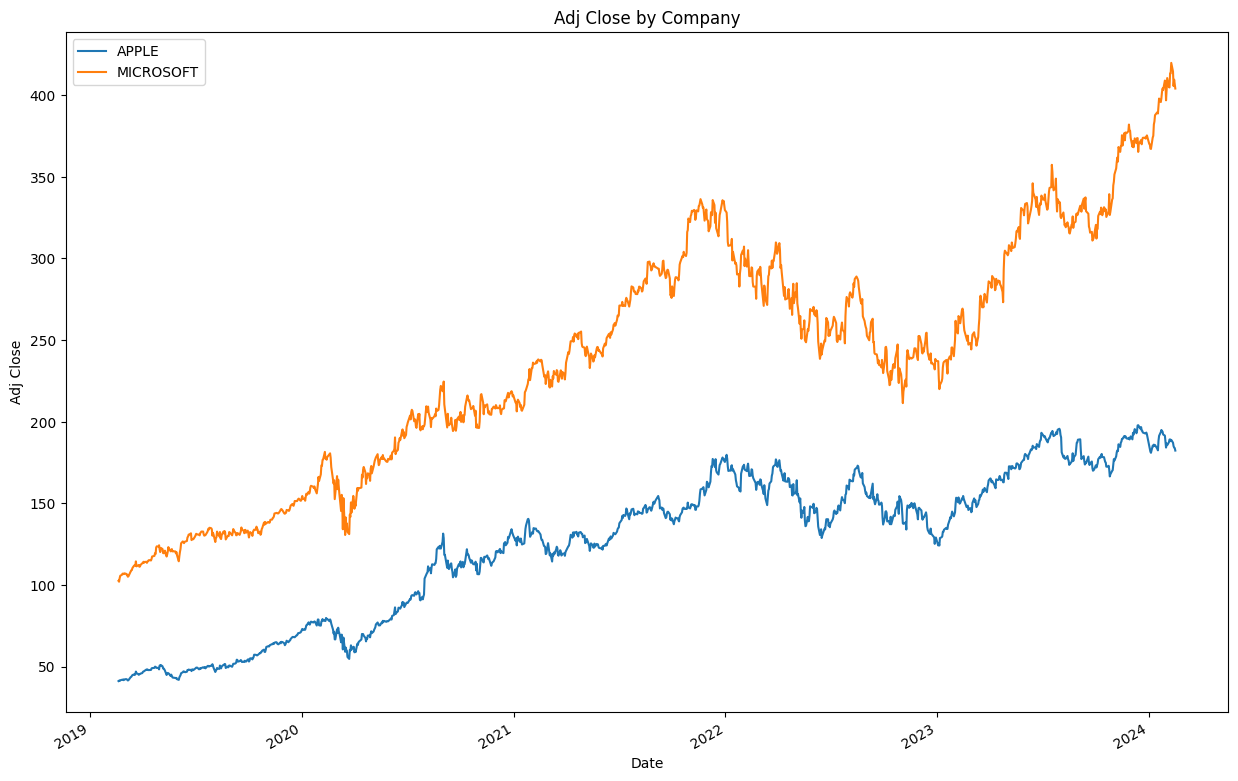

In [64]:
# Plot the time series of Microsoft and Apple stock prices on the same plot
# include a legend
## YOUR CODE STARTS HERE

# Plot column value (e.g. Adj Close, Volume) by company on same plot
def plot_col_by_company_group(df, col_name):
    fig, ax = plt.subplots()
    for name, group in df.groupby('company_name'):
        group.plot(ax=ax, y=col_name, label=name, title=f"{col_name} by Company", xlabel="Date", ylabel=col_name, figsize=(15,10))

# Plot column value (e.g. Adj Close, Volume) by company on same subplot
def plot_col_by_company_separate(df, col_name):
    group_by_company = df.groupby('company_name')
    num_groups = len(group_by_company)
    fig, ax = plt.subplots(num_groups, 1, figsize=(15,10))
    for i, (name, group) in enumerate(group_by_company):
        group.plot(ax=ax[i], y=col_name, legend=False, title=f"{name} {col_name}", xlabel="Date", ylabel=col_name)


# Plot Adj Close by company on same plot
plot_col_by_company_group(stocks_df, 'Adj Close')



**Enter answer here:**

***Question: Comment whether you see any
trends over time and how Microsoft and Apple stock prices compare to each other***

Generally, there is a increase in stock prices for Apple and Microsoft from 2019 to 2022. Then in 2022 there is a bit of a dip for both companies from 2022-2023 before the increase begins.

## (b)

In [65]:
# Downsample Microsoft stock data to weekly, monthly, quarterly, semi-annually and annually frequency

## YOUR CODE STARTS HERE

# weekly
stocks_weekly = stocks_df.groupby('company_name').resample('W').mean()

# Downsample the data to monthly
stocks_monthly = stocks_df.groupby('company_name').resample('M').mean()

# Downsample the data to quarterly
stocks_quarterly = stocks_df.groupby('company_name').resample('Q').mean()

# Downsample the data to semi-annually
stocks_semiannually = stocks_df.groupby('company_name').resample('6M').mean()

# Downsample the data to annually
stocks_annually = stocks_df.groupby('company_name').resample('A').mean()



<ipython-input-65-c7358c3ba969>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stocks_weekly = stocks_df.groupby('company_name').resample('W').mean()
<ipython-input-65-c7358c3ba969>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stocks_weekly = stocks_df.groupby('company_name').resample('W').mean()
<ipython-input-65-c7358c3ba969>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stocks_monthly = stocks_df.groupby('

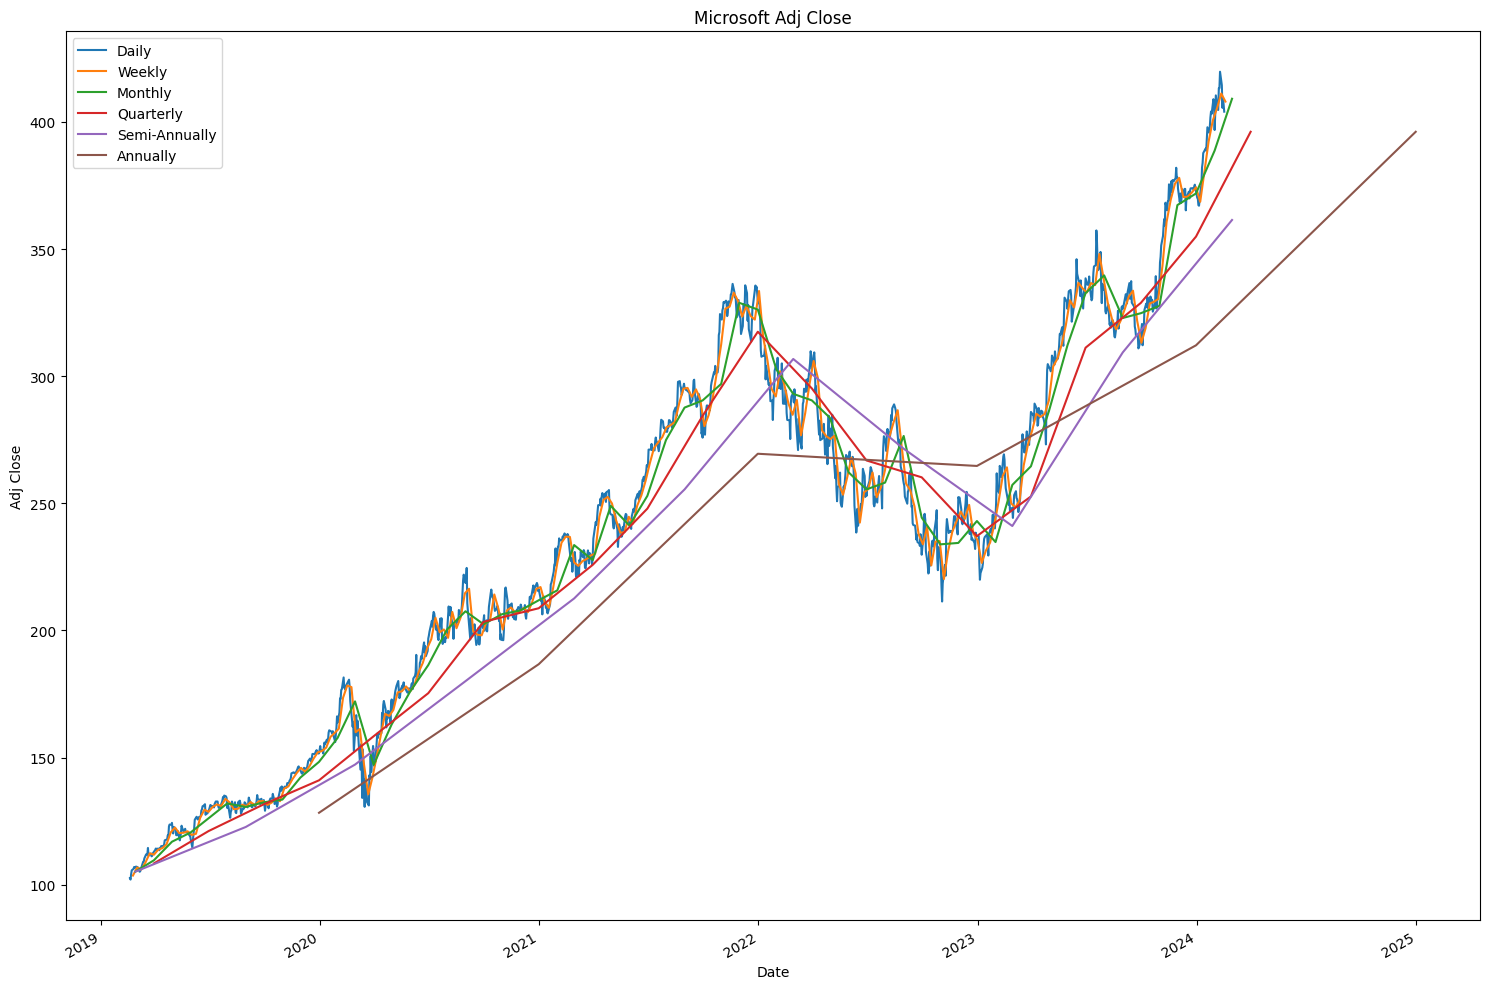

In [66]:
# Plot the daily, weekly, monthly, quarterly, semi-annually and annually stock prices for Microsoft on the same plot (use figsize=(15, 10))

## YOUR CODE STARTS HERE
# Plot downsampled and original Adj Close by company on same subplot
# stocks_df and the downsampled data frames have already been defined

# Filter the original DataFrame for Microsoft only if it's not already done
microsoft_df = stocks_df[stocks_df['company_name'] == 'MICROSOFT']

# downsampled data frames are already defined
# Since these DataFrames are grouped by company_name, you can directly access Microsoft's data

# Setup for plotting
fig, ax = plt.subplots(figsize=(15, 10))

# Plotting the original data for Microsoft
microsoft_df['Adj Close'].plot(ax=ax, label='Daily', title="Microsoft Adj Close")

# Plotting downsampled data for Microsoft
# Access the Microsoft data directly since the company_name is part of the multi-index
stocks_weekly.loc['MICROSOFT']['Adj Close'].plot(ax=ax, label='Weekly')
stocks_monthly.loc['MICROSOFT']['Adj Close'].plot(ax=ax, label='Monthly')
stocks_quarterly.loc['MICROSOFT']['Adj Close'].plot(ax=ax, label='Quarterly')
stocks_semiannually.loc['MICROSOFT']['Adj Close'].plot(ax=ax, label='Semi-Annually')
stocks_annually.loc['MICROSOFT']['Adj Close'].plot(ax=ax, label='Annually')

ax.set_xlabel("Date")
ax.set_ylabel("Adj Close")
ax.legend()

plt.tight_layout()
plt.show()




In [67]:
# Downsample Apple stock data to weekly, monthly, quarterly, semi-annually and annually frequency

## YOUR CODE STARTS HERE

# weekly
stocks_weekly = stocks_df.groupby('company_name').resample('W').mean()

# Downsample the data to monthly
stocks_monthly = stocks_df.groupby('company_name').resample('M').mean()

# Downsample the data to quarterly
stocks_quarterly = stocks_df.groupby('company_name').resample('Q').mean()

# Downsample the data to semi-annually
stocks_semiannually = stocks_df.groupby('company_name').resample('6M').mean()

# Downsample the data to annually
stocks_annually = stocks_df.groupby('company_name').resample('A').mean()



<ipython-input-67-9e3b372d4e66>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stocks_weekly = stocks_df.groupby('company_name').resample('W').mean()
<ipython-input-67-9e3b372d4e66>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stocks_weekly = stocks_df.groupby('company_name').resample('W').mean()
<ipython-input-67-9e3b372d4e66>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stocks_monthly = stocks_df.groupby('

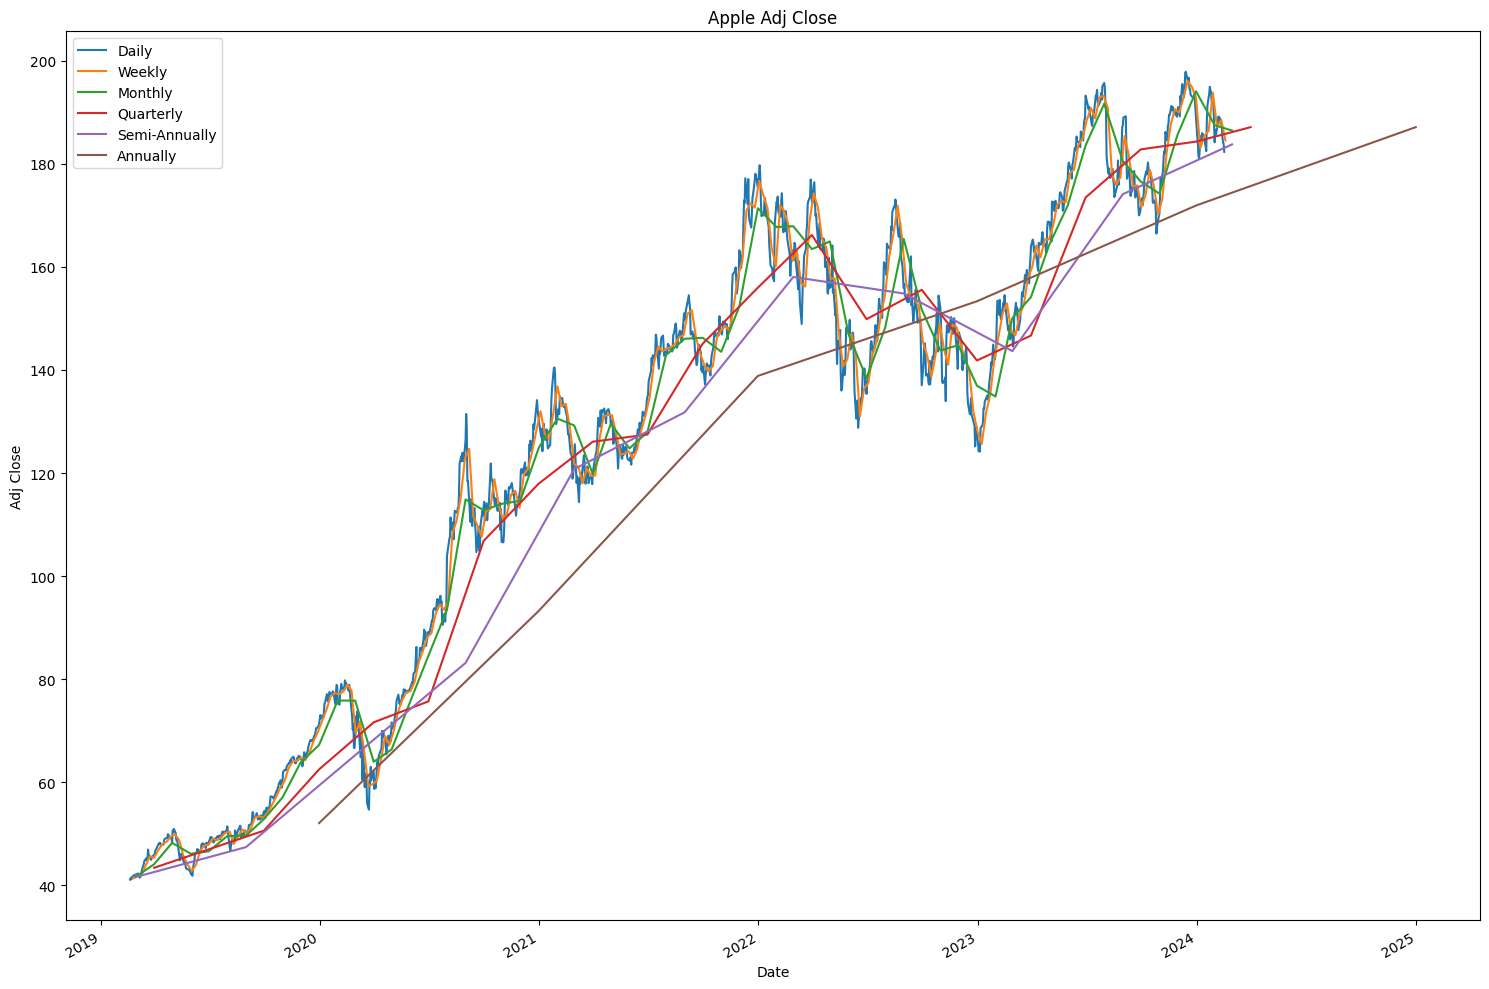

In [68]:
# Plot the daily, weekly, monthly, quarterly, semi-annually and annually stock prices for Apple on the same plot (use figsize=(15, 10))

## YOUR CODE STARTS HERE


# stocks_df and the downsampled data frames have already been defined
# Filter the original DataFrame for Microsoft only if it's not already done
apple_df = stocks_df[stocks_df['company_name'] == 'APPLE']

# Assuming the downsampled data frames are already defined
# Since these DataFrames are grouped by company_name, you can directly access Microsoft's data

# Setup for plotting
fig, ax = plt.subplots(figsize=(15, 10))

# Plotting the original data for Microsoft
apple_df['Adj Close'].plot(ax=ax, label='Daily', title="Apple Adj Close")

# Plotting downsampled data for Microsoft
# Access the Microsoft data directly since the company_name is part of the multi-index
stocks_weekly.loc['APPLE']['Adj Close'].plot(ax=ax, label='Weekly')
stocks_monthly.loc['APPLE']['Adj Close'].plot(ax=ax, label='Monthly')
stocks_quarterly.loc['APPLE']['Adj Close'].plot(ax=ax, label='Quarterly')
stocks_semiannually.loc['APPLE']['Adj Close'].plot(ax=ax, label='Semi-Annually')
stocks_annually.loc['APPLE']['Adj Close'].plot(ax=ax, label='Annually')

ax.set_xlabel("Date")
ax.set_ylabel("Adj Close")
ax.legend()

plt.tight_layout()
plt.show()

## (c)


**Enter answer here:**

***Mention one pro and one con of downsampling. From the plots, what is the most appropriate
time-scale to downsample to for this dataset?***

Downsampling time series data, such as stock prices, helps in reducing noise and clarifying long-term trends but comes at the cost of losing detailed information about significant short-term events. The most appropriate downsampling frequency depends on the analysis goals; monthly or quarterly frequencies are suitable for identifying long-term trends, while weekly data might be better for more active trading strategies that aim to balance detail with trend clarity. The choice of time-scale should align with the specific insights sought from the data, balancing the need for trend identification against the risk of overlooking important short-term fluctuations.





# Q2



## (a)

In [69]:
# Add a column to the monthly downsampled Microsoft dataframe (from Q1) called 'monthly_return'
# This column will contain the monthly return of the stock (use the pct_change() method)
# Then display the first 5 rows of the dataframe

# Use the monthly downsampled Microsoft DataFrame from Q1(b) to compute the monthly
# return rate (hint: use Pandas .pct change() method). Add these values as a column with
# the heading monthly return to the monthly downsampled Microsoft DataFrame. Display
# the first five rows of the modified monthly downsampled Microsoft DataFrame.

# First, filter to get the monthly downsampled data specifically for Microsoft
microsoft_stocks_monthly = stocks_monthly.loc['MICROSOFT']

# Compute the monthly return rate using the pct_change() method
microsoft_stocks_monthly['monthly_return'] = microsoft_stocks_monthly['Adj Close'].pct_change()


# Display the first five rows of the modified DataFrame
microsoft_stocks_monthly.head()



,Adj Close,monthly_return
Date,,
2019-02-28,105.111517,NaN
2019-03-31,109.594991,0.042654
2019-04-30,116.887392,0.066540
2019-05-31,120.511057,0.031001
2019-06-30,126.109168,0.046453


In [70]:
# Do the same for the monthly downsampled Apple dataframe

## YOUR CODE STARTS HERE
# First, filter to get the monthly downsampled data specifically for Apple
apple_stocks_monthly = stocks_monthly.loc['APPLE']

# Compute the monthly return rate using the pct_change() method
apple_stocks_monthly['monthly_return'] = apple_stocks_monthly['Adj Close'].pct_change()

# Display the first five rows of the modified DataFrame
apple_stocks_monthly.head()



,Adj Close,monthly_return
Date,,
2019-02-28,41.623787,NaN
2019-03-31,44.114187,0.059831
2019-04-30,48.259177,0.093960
2019-05-31,46.151073,-0.043683
2019-06-30,46.621609,0.010196


**Enter answer here:**

***Comment on why the first monthly return rate is NaN (not a number)***

The first monthly return rate in a time series data set calculated using the percentage change method (e.g., .pct_change() in pandas) is NaN (Not a Number) because there is no preceding data point to compare with in order to calculate the return rate.





## (b)

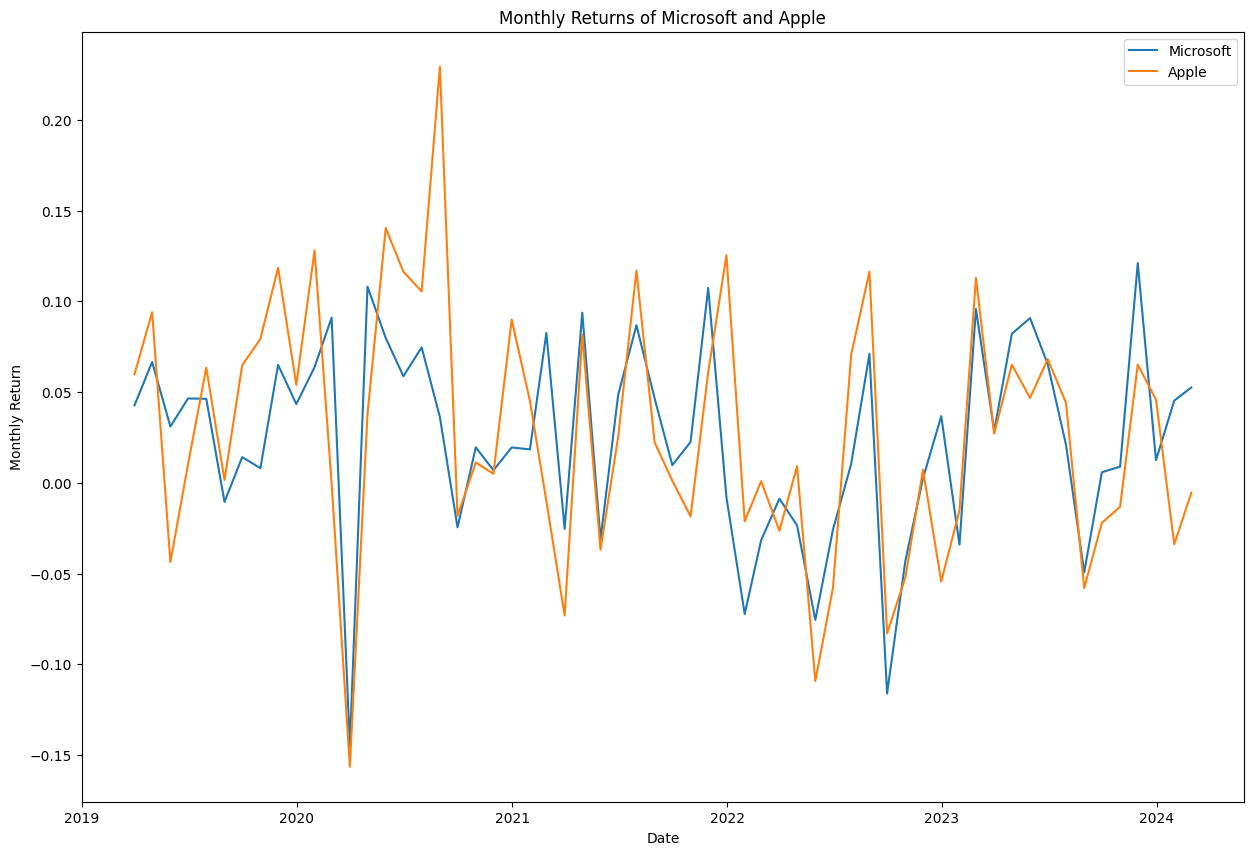

In [71]:
# Plot the monthly return of Microsoft and Apple stocks on the same plot

## YOUR CODE STARTS HERE

plt.figure(figsize=(15, 10))

# Plot Microsoft monthly returns
plt.plot(microsoft_stocks_monthly.index, microsoft_stocks_monthly['monthly_return'], label='Microsoft')

# Plot Apple monthly returns
plt.plot(apple_stocks_monthly.index, apple_stocks_monthly['monthly_return'], label='Apple')

# Adding plot title and labels
plt.title('Monthly Returns of Microsoft and Apple')
plt.xlabel('Date')
plt.ylabel('Monthly Return')
plt.legend()

# Show the plot
plt.show()


**Enter answer here:**

***Use 1-2 sentences to comment on whether you see any consistent patterns over time and any insight this plot gives that is not obvious from the plot in Q1(a)***

Once the plot was downsampled to a monthly basis, there was a significance of noise reduction allowing us to view the broader directional movements of the monthly returns rather than short-term. We are able to see that despite a significant low and peak around 2020 to 2021, the monthly return as been relatively stable with its regular ups and downs.


# Q3

## (a)

In [72]:
# Smooth the monthly stock prices of Microsoft using exponential smoothing with alpha = 0.1, 0.3, 0.5, 0.7, 0.9

## YOUR CODE STARTS HERE
# Apply exponential smoothing to stock data with alpha = 0.1, 0.5, and 0.9
stocks_exp_01 = microsoft_stocks_monthly.ewm(alpha=0.1, adjust=False).mean()
stocks_exp_03 = microsoft_stocks_monthly.ewm(alpha=0.3, adjust=False).mean()
stocks_exp_05 = microsoft_stocks_monthly.ewm(alpha=0.5, adjust=False).mean()
stocks_exp_07 = microsoft_stocks_monthly.ewm(alpha=0.7, adjust=False).mean()
stocks_exp_09 = microsoft_stocks_monthly.ewm(alpha=0.9, adjust=False).mean()



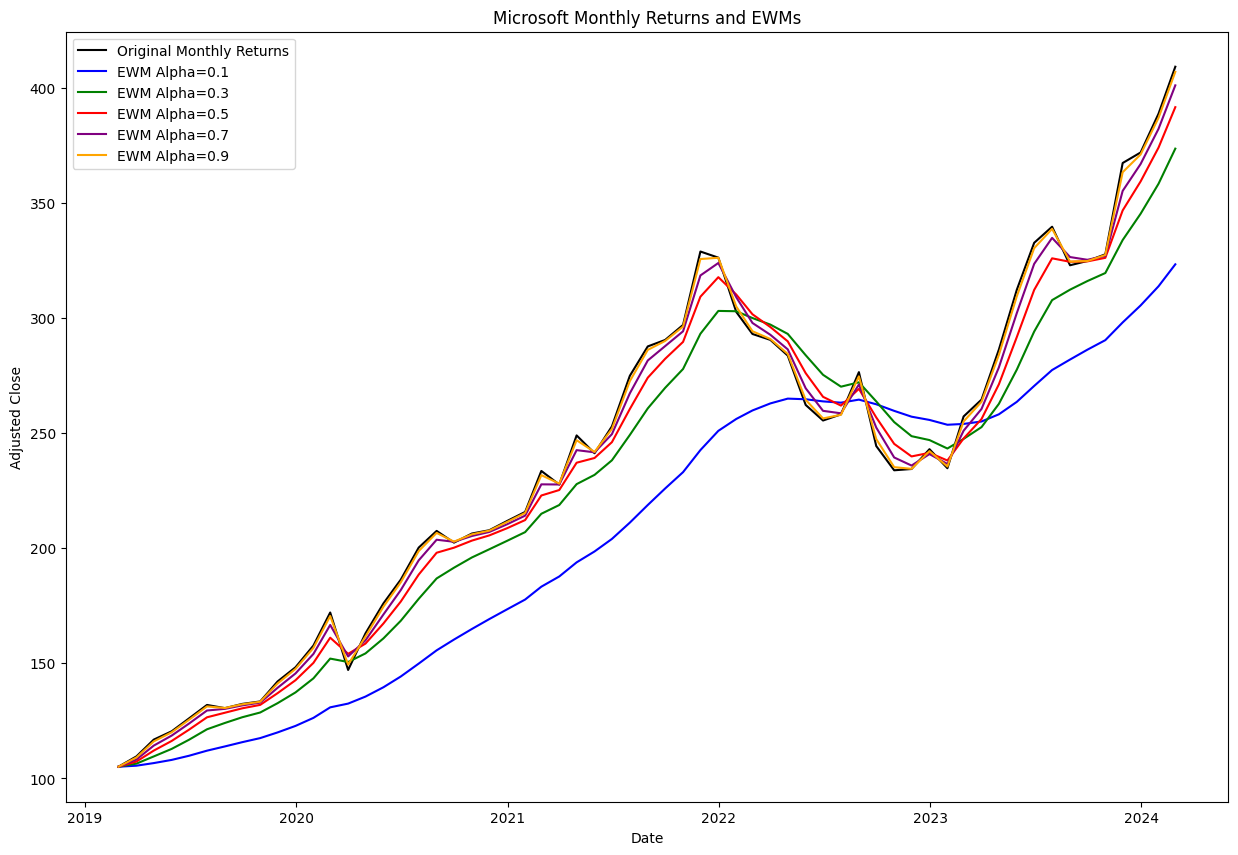

In [73]:
# Plot the monthly and smoothed monthly stock prices of Microsoft on the same plot (6 lines)

## YOUR CODE STARTS HERE

# Plotting
plt.figure(figsize=(15, 10))
plt.plot(microsoft_stocks_monthly.index, microsoft_stocks_monthly['Adj Close'], label='Original Monthly Returns', color='black')
plt.plot(stocks_exp_01.index, stocks_exp_01['Adj Close'], label='EWM Alpha=0.1', color='blue')
plt.plot(stocks_exp_03.index, stocks_exp_03['Adj Close'], label='EWM Alpha=0.3', color='green')
plt.plot(stocks_exp_05.index, stocks_exp_05['Adj Close'], label='EWM Alpha=0.5', color='red')
plt.plot(stocks_exp_07.index, stocks_exp_07['Adj Close'], label='EWM Alpha=0.7', color='purple')
plt.plot(stocks_exp_09.index, stocks_exp_09['Adj Close'], label='EWM Alpha=0.9', color='orange')

# Adding plot title and labels
plt.title('Microsoft Monthly Returns and EWMs')
plt.xlabel('Date')
plt.ylabel('Adjusted Close')
plt.legend()

# Show the plot
plt.show()



In [74]:
# Smooth the monthly stock prices of Apple using exponential smoothing with alpha = 0.1, 0.3, 0.5, 0.7, 0.9

## YOUR CODE STARTS HERE
# Apply exponential smoothing to stock data with alpha = 0.1, 0.5, and 0.9
stocks_exp_01 = apple_stocks_monthly.ewm(alpha=0.1, adjust=False).mean()
stocks_exp_03 = apple_stocks_monthly.ewm(alpha=0.3, adjust=False).mean()
stocks_exp_05 = apple_stocks_monthly.ewm(alpha=0.5, adjust=False).mean()
stocks_exp_07 = apple_stocks_monthly.ewm(alpha=0.7, adjust=False).mean()
stocks_exp_09 = apple_stocks_monthly.ewm(alpha=0.9, adjust=False).mean()



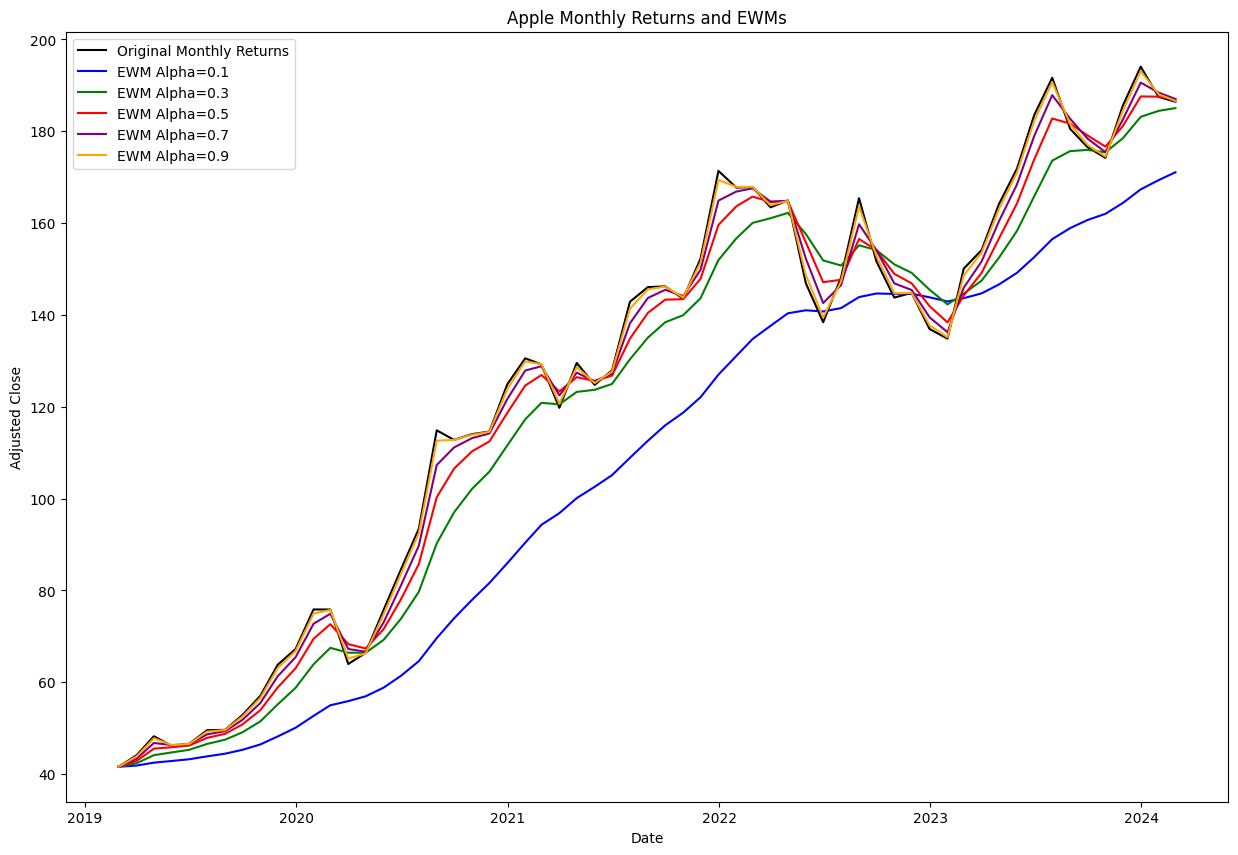

In [75]:
# Plot the monthly and smoothed monthly stock prices of Apple on the same plot (6 lines)

## YOUR CODE STARTS HERE
# Plotting
plt.figure(figsize=(15, 10))
plt.plot(apple_stocks_monthly.index, apple_stocks_monthly['Adj Close'], label='Original Monthly Returns', color='black')
plt.plot(stocks_exp_01.index, stocks_exp_01['Adj Close'], label='EWM Alpha=0.1', color='blue')
plt.plot(stocks_exp_03.index, stocks_exp_03['Adj Close'], label='EWM Alpha=0.3', color='green')
plt.plot(stocks_exp_05.index, stocks_exp_05['Adj Close'], label='EWM Alpha=0.5', color='red')
plt.plot(stocks_exp_07.index, stocks_exp_07['Adj Close'], label='EWM Alpha=0.7', color='purple')
plt.plot(stocks_exp_09.index, stocks_exp_09['Adj Close'], label='EWM Alpha=0.9', color='orange')

# Adding plot title and labels
plt.title('Apple Monthly Returns and EWMs')
plt.xlabel('Date')
plt.ylabel('Adjusted Close')
plt.legend()

# Show the plot
plt.show()



## (b)

**Enter your answer here:**

*Question: Comment on the effect of decreasing the smoothing parameter α.*

Decreasing the smoothing parameter (alpha) in an exponential weighted moving average (EWM) leads to a smoother curve that reacts more slowly to recent price changes, as it places greater emphasis on older data, resulting in a plot that is less sensitive to short-term fluctuations in the data.



# Q4
figsize 15x20 for all plots

## (a)

<Axes: title={'center': 'Edmonton Temperature'}, xlabel='Date', ylabel='Temperature'>

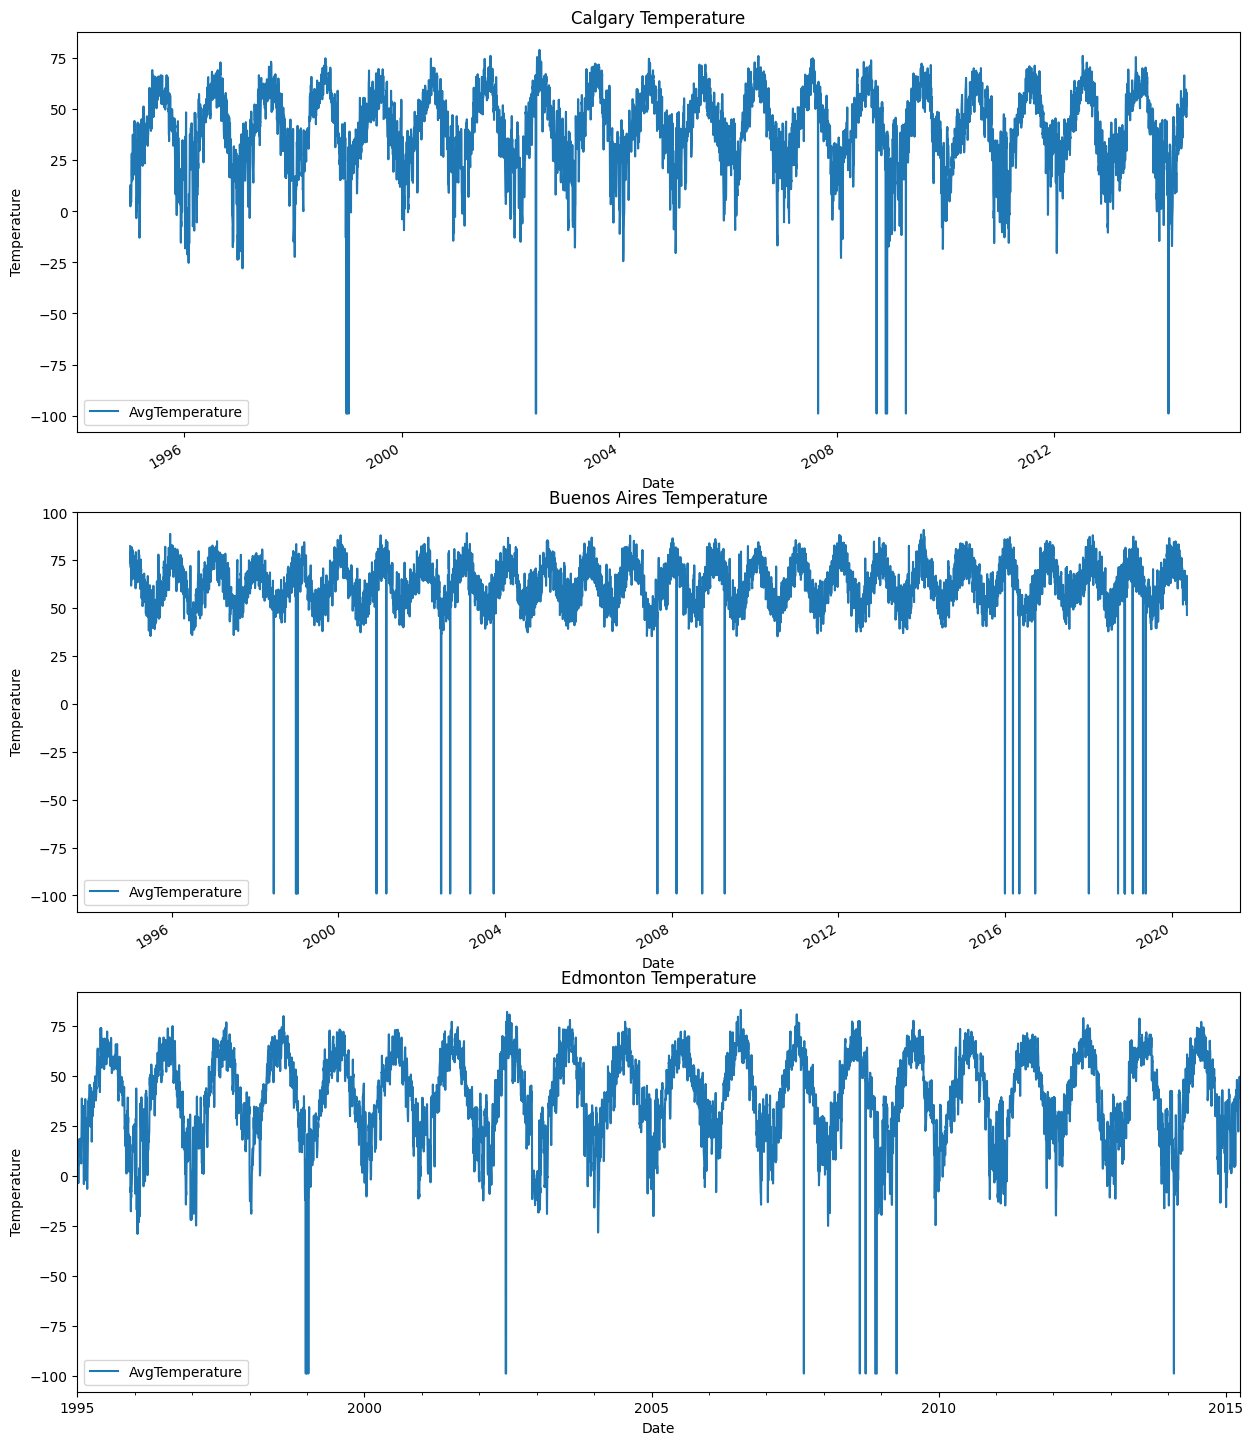

In [76]:
# Plot temperature data for each city in different subplots

# Provide a 3x1 subplot of the daily temperature in Calgary, Buenos Aires, and Edmonton (in
# that order) over time. Use 1-2 sentences to highlight the two problems that this visualization
# reveals (hint: look at pre-processing steps in Q4(b))

## YOUR CODE STARTS HERE

# Cities of interest
city_1 = "Calgary"
city_2 = "Buenos Aires"
city_3 = "Edmonton"

# Extract data for cities
city_1_df = temperature_df[temperature_df['City'] == city_1].copy() # Use copy to avoid SettingWithCopyWarning
city_2_df = temperature_df[temperature_df['City'] == city_2].copy()
city_3_df = temperature_df[temperature_df['City'] == city_3].copy()

# Create new Date column by aggregating Month, Day, and Year columns to MM/DD/YYYY format, then convert to DateTimeIndex
city_1_df['Date'] = pd.to_datetime(city_1_df['Month'].astype(str) + '/' + city_1_df['Day'].astype(str) + '/' + city_1_df['Year'].astype(str))
city_1_df = city_1_df.set_index('Date')

city_2_df['Date'] = pd.to_datetime(city_2_df['Month'].astype(str) + '/' + city_2_df['Day'].astype(str) + '/' + city_2_df['Year'].astype(str))
city_2_df = city_2_df.set_index('Date')

city_3_df['Date'] = pd.to_datetime(city_3_df['Month'].astype(str) + '/' + city_3_df['Day'].astype(str) + '/' + city_3_df['Year'].astype(str))
city_3_df = city_3_df.set_index('Date')

# Keep only the columns we need
city_1_df = city_1_df[['AvgTemperature']]
city_2_df = city_2_df[['AvgTemperature']]
city_3_df = city_3_df[['AvgTemperature']]

# Plot temperature data for each city in different subplots
fig, ax = plt.subplots(3, 1, figsize=(15,20))
city_1_df.plot(ax=ax[0], title=f"{city_1} Temperature", xlabel="Date", ylabel="Temperature")
city_2_df.plot(ax=ax[1], title=f"{city_2} Temperature", xlabel="Date", ylabel="Temperature")
city_3_df.plot(ax=ax[2], title=f"{city_3} Temperature", xlabel="Date", ylabel="Temperature")



**Enter answer here:**
*Question: Highlight 2 problems that this visualization reveals?*

1. The timelines of the 3 cities are different and therefore make it difficult to compare the data from first observation.
2. The data is very noisy and difficult to read and could use smoothing.

## (b)

In [77]:
# Remove entries that aren't in intersection of all three indices (which are dates)

## YOUR CODE STARTS HERE
# Remove entries that aren't in intersection of all three indices (which are dates)
index_intersection = city_1_df.index.intersection(city_2_df.index).intersection(city_3_df.index)
city_1_df = city_1_df.loc[index_intersection]
city_2_df = city_2_df.loc[index_intersection]
city_3_df = city_3_df.loc[index_intersection]

In [78]:
# Downsample the data to monthly

## YOUR CODE STARTS HERE
# Remove entries that aren't in intersection of all three indices (which are dates)
index_intersection = city_1_df.index.intersection(city_2_df.index).intersection(city_3_df.index)
city_1_df = city_1_df.loc[index_intersection]
city_2_df = city_2_df.loc[index_intersection]
city_3_df = city_3_df.loc[index_intersection]

In [79]:
# Apply exponential smoothing to temperature data with alpha = 0.3

# Downsample the data to monthly
city_1_monthly = city_1_df.resample('M').mean()
city_2_monthly = city_2_df.resample('M').mean()
city_3_monthly = city_3_df.resample('M').mean()

## YOUR CODE STARTS HERE
# Apply exponential smoothing to temperature data with alpha = 0.3
city_1_monthly = city_1_monthly.ewm(alpha=0.3, adjust=False).mean()
city_2_monthly = city_2_monthly.ewm(alpha=0.3, adjust=False).mean()
city_3_monthly = city_3_monthly.ewm(alpha=0.3, adjust=False).mean()

<Axes: title={'center': 'Edmonton Monthly Temperature'}, xlabel='Date', ylabel='AvgTemperature'>

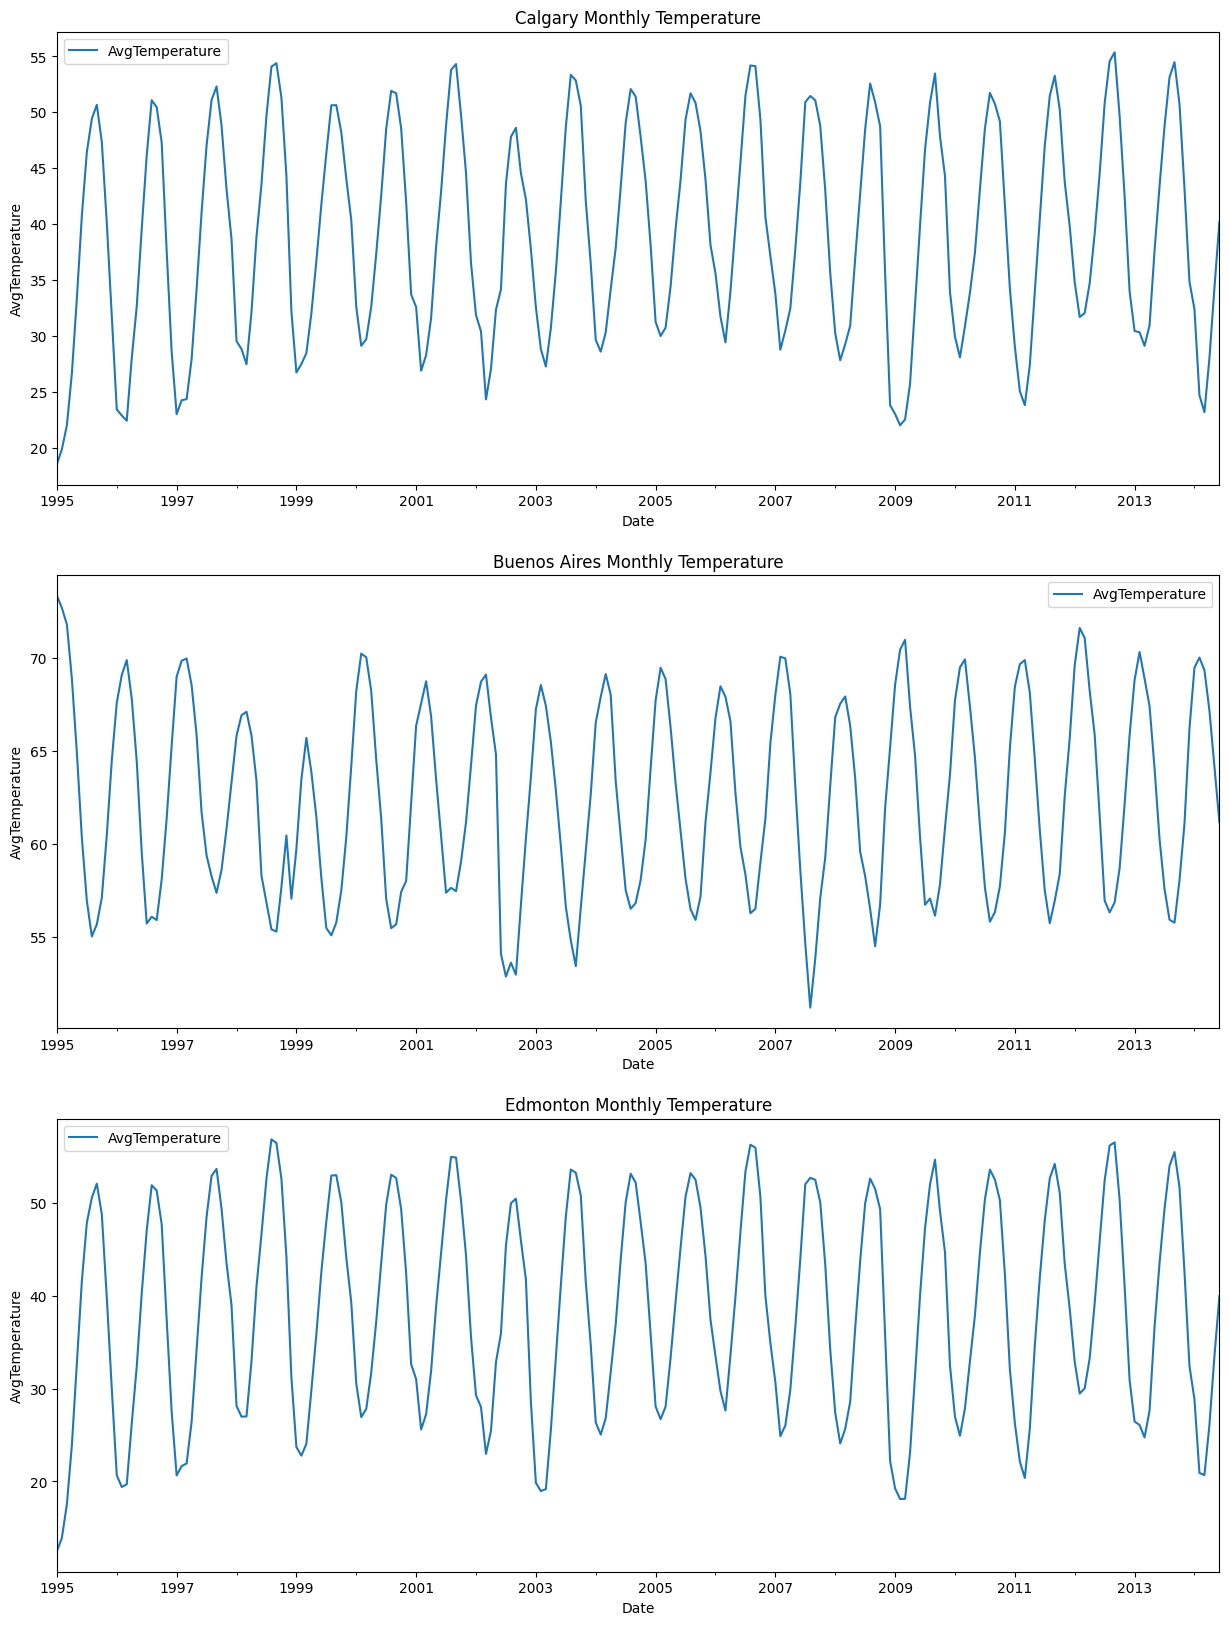

In [80]:
# Plot monthly smoothed temperature data for cities in different subplots

## YOUR CODE STARTS HERE
# Plot monthly temperature data for cities in different subplots
fig, ax = plt.subplots(3, 1, figsize=(15,20))
city_1_monthly.plot(ax=ax[0], y='AvgTemperature', title=f"{city_1} Monthly Temperature", xlabel="Date", ylabel="AvgTemperature")
city_2_monthly.plot(ax=ax[1], y='AvgTemperature', title=f"{city_2} Monthly Temperature", xlabel="Date", ylabel="AvgTemperature")
city_3_monthly.plot(ax=ax[2], y='AvgTemperature', title=f"{city_3} Monthly Temperature", xlabel="Date", ylabel="AvgTemperature")

**Enter answer here:**
*Use 1-2 sentences to comment on (1) any patterns that the plots exhibit
and (2) which two cities would you expect to be closest to each other and why?*

1. The plots show a cyclical pattern of seasons every year as the temperatures increase and decrease at intervals that are relatively similar each year.

2. I would expect Edmonton and Calgary to be the closest to each other in terms of temperature because they are located in the same province of Alberta.

## (c)

Text(0, 0.5, 'Correlation')

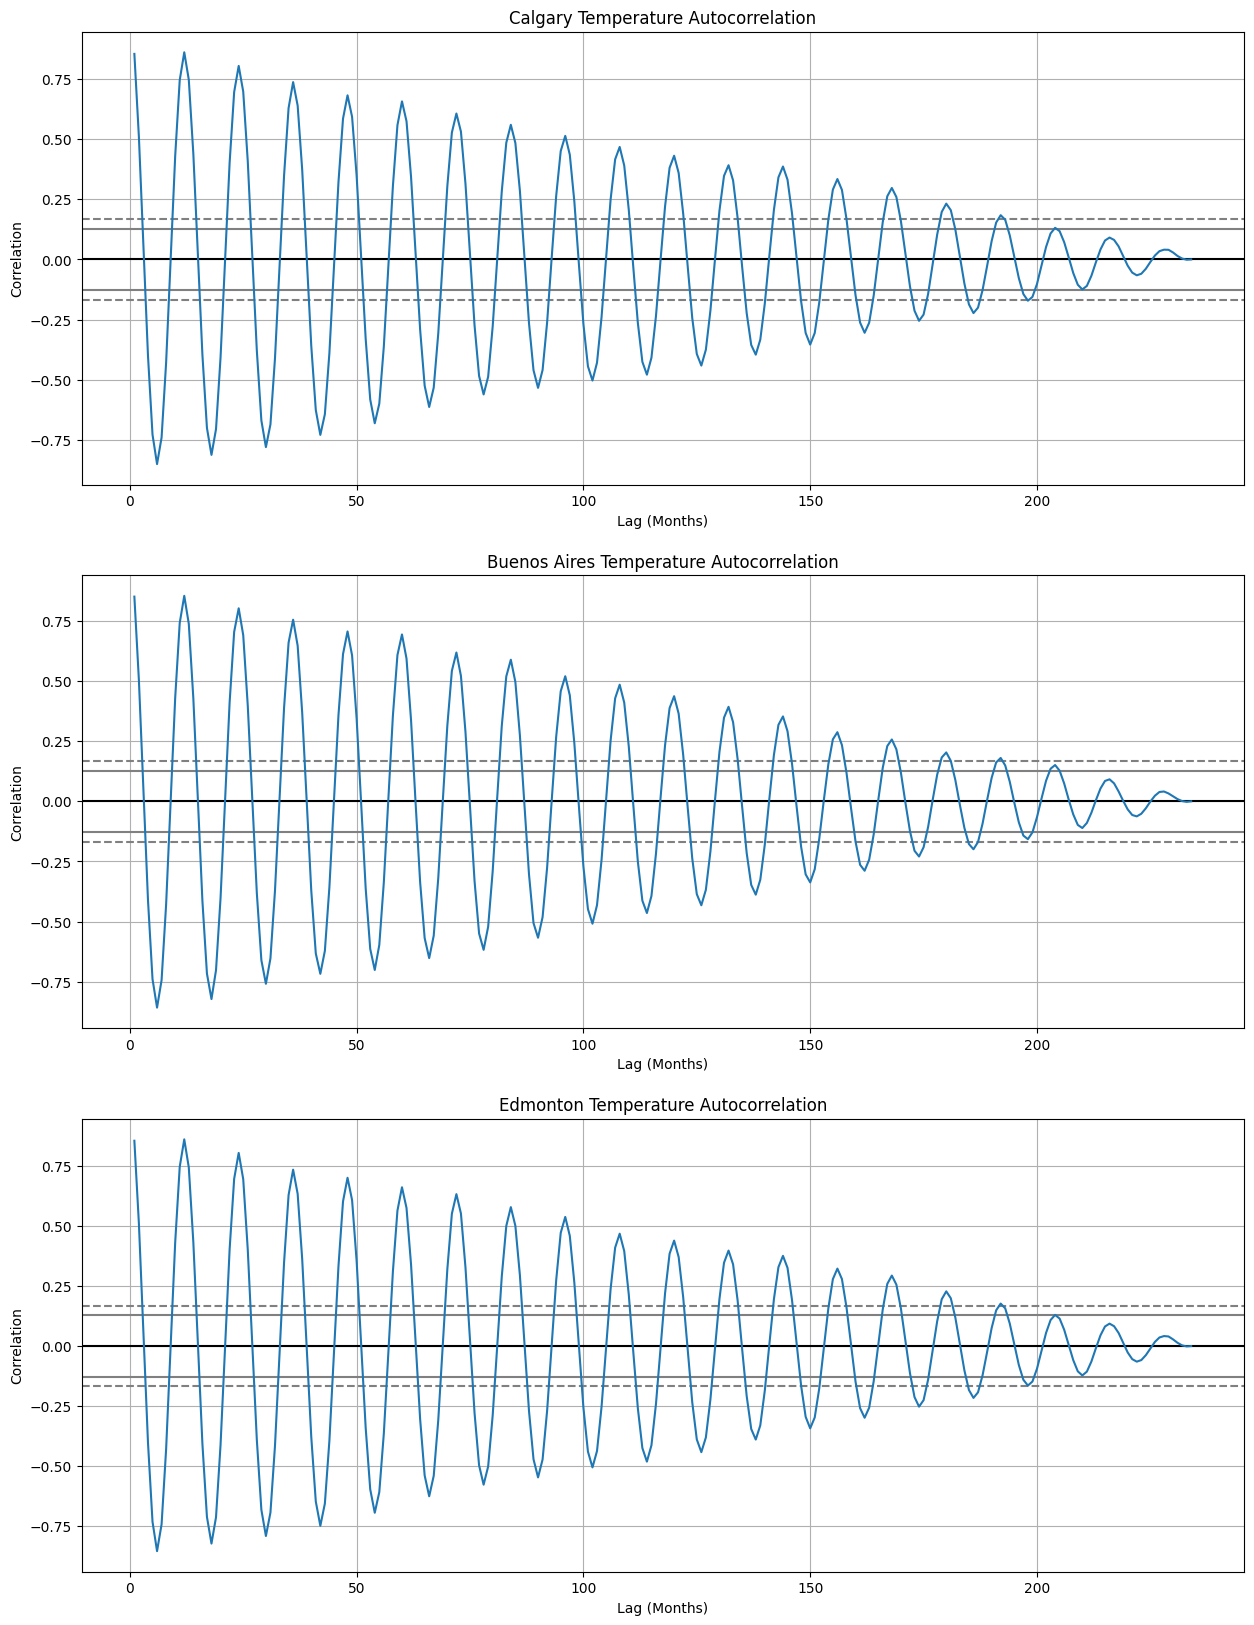

In [81]:
# Plot auto-correlation of the monthly smoothed temperature of cities in different subplots
# Hint: use pd.plotting.autocorrelation_plot()

## YOUR CODE STARTS HERE

fig, ax = plt.subplots(3, 1, figsize=(15,20))

pd.plotting.autocorrelation_plot(city_1_monthly['AvgTemperature'], ax=ax[0])
ax[0].set_title(f"{city_1} Temperature Autocorrelation")
ax[0].set_xlabel("Lag (Months)")
ax[0].set_ylabel("Correlation")

pd.plotting.autocorrelation_plot(city_2_monthly['AvgTemperature'], ax=ax[1])
ax[1].set_title(f"{city_2} Temperature Autocorrelation")
ax[1].set_xlabel("Lag (Months)")
ax[1].set_ylabel("Correlation")

pd.plotting.autocorrelation_plot(city_3_monthly['AvgTemperature'], ax=ax[2])
ax[2].set_title(f"{city_3} Temperature Autocorrelation")
ax[2].set_xlabel("Lag (Months)")
ax[2].set_ylabel("Correlation")


**Enter answer here:**

*Use 1-2 sentences to comment
on whether the autocorrelation plots confirm the patterns you observed in Q4(b) and if any other insights can be drawn from the autocorrelation plot (hint: consider what happens to the autocorrelation as the lag increases)*

As the lag increases, the size of the autocorrelation decreases. This can be seen with the height of the waves decreasing as lag increases. The decreasing magnitude of the peaks/valleys suggest the presence of a trend as well (for example: warmer temperatures due to climate change).



## (d)

Text(0, 0.5, 'Correlation')

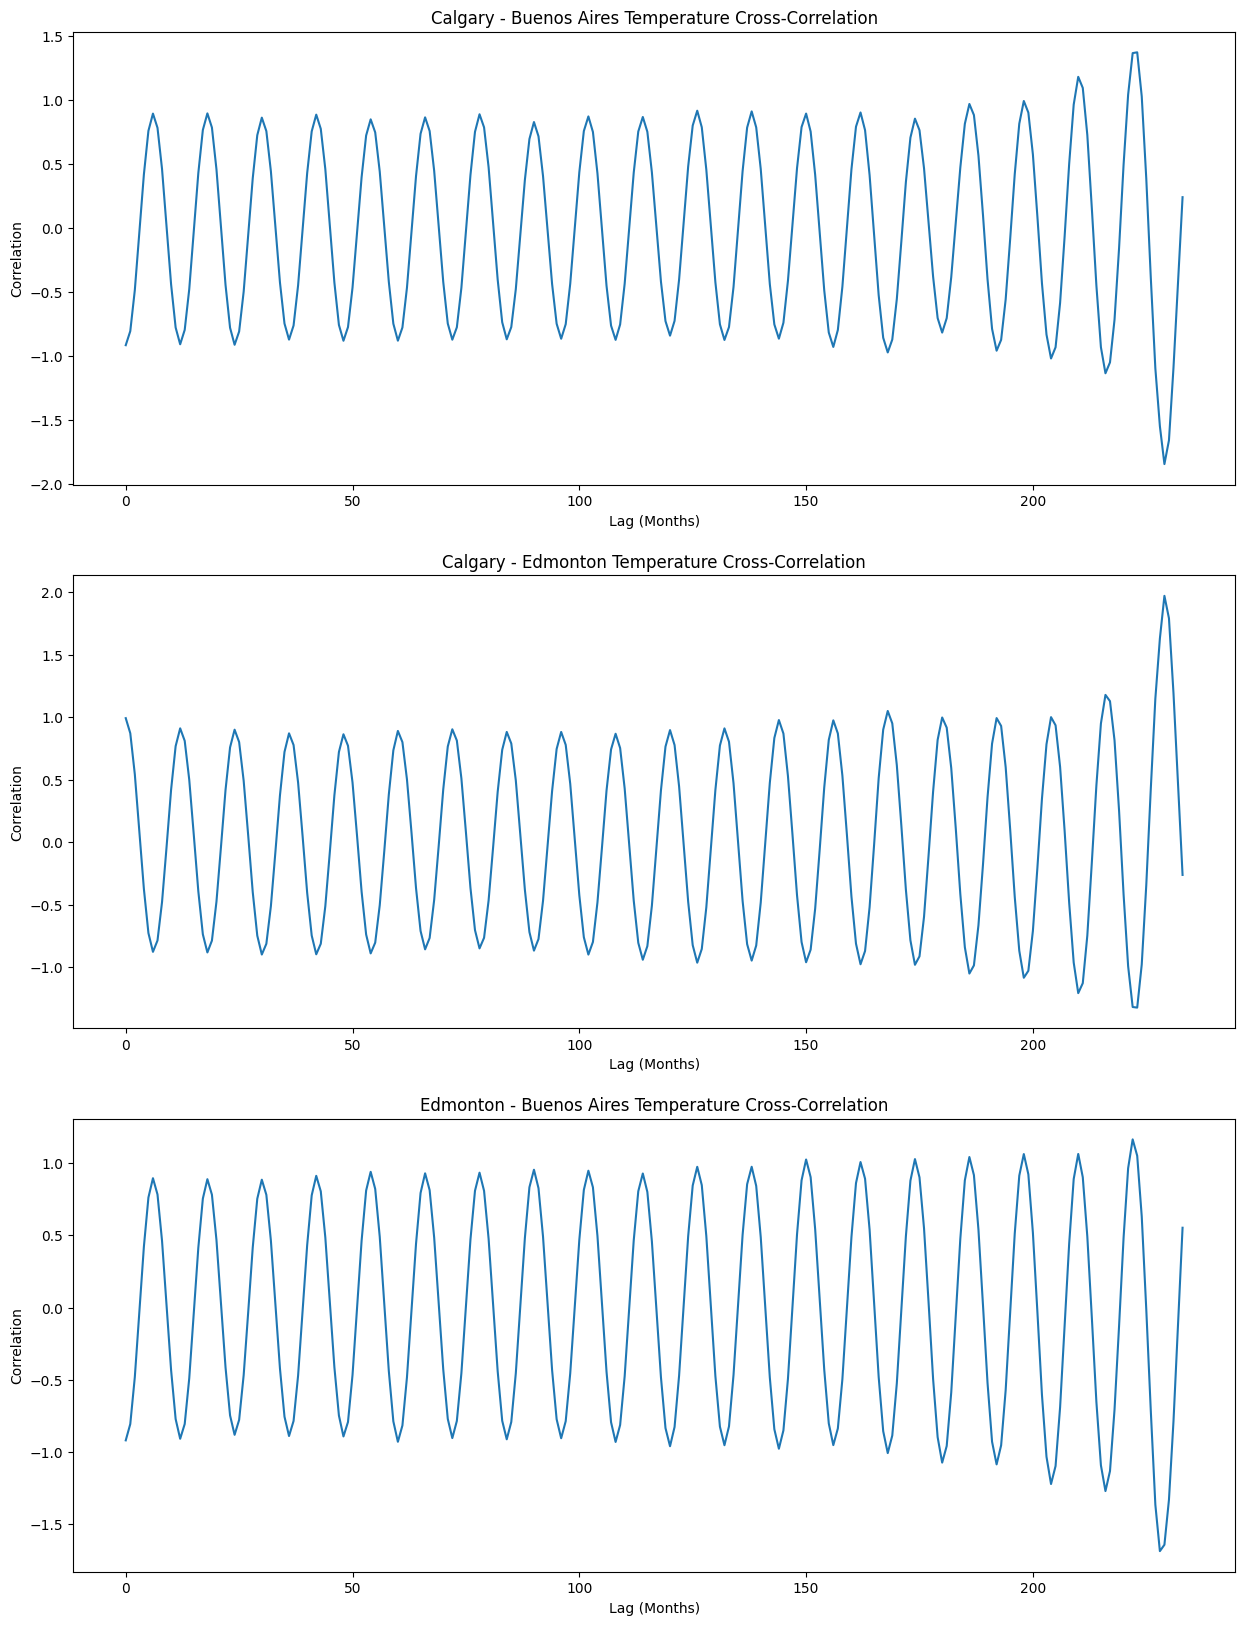

In [82]:
# Plot cross-correlation between city pairs (Calgary and Buenos Aires, Calgary and Edmonton, Buenos Aires and Edmonton)
# Hint: use ccf() function from statsmodels.tsa.stattools

## YOUR CODE STARTS HERE
# Plot cross-correlation between city temperature pairs

fig, ax = plt.subplots(3, 1, figsize=(15,20))

ccf_12 = ccf(city_1_monthly['AvgTemperature'], city_2_monthly['AvgTemperature'])
ccf_13 = ccf(city_1_monthly['AvgTemperature'], city_3_monthly['AvgTemperature'])
ccf_23 = ccf(city_2_monthly['AvgTemperature'], city_3_monthly['AvgTemperature'])

ax[0].plot(ccf_12)
ax[0].set_title(f"{city_1} - {city_2} Temperature Cross-Correlation")
ax[0].set_xlabel("Lag (Months)")
ax[0].set_ylabel("Correlation")

ax[1].plot(ccf_13)
ax[1].set_title(f"{city_1} - {city_3} Temperature Cross-Correlation")
ax[1].set_xlabel("Lag (Months)")
ax[1].set_ylabel("Correlation")

ax[2].plot(ccf_23)
ax[2].set_title(f"{city_3} - {city_2} Temperature Cross-Correlation")
ax[2].set_xlabel("Lag (Months)")
ax[2].set_ylabel("Correlation")


**Enter answer here:**

*Question: Use these plots to deduce the following: when it is summer in Edmonton, what season is it in Buenos Aires and Calgary?*

Identify zero lag correlation:  

For **Edmonton and Calgary**, since the correlation at 0 lag is almost 1.0, it implies that when it is summer for Edmonton it is also summer or warm temperatures for Calgary, which from logic of these two cities being in the same province, we can infer.

For **Edmonton and Buenos Aires**, since the correlation at 0 lag is almost -1.0, we can infer that there are opposite temperature patterns at the same time. If it is summer in Edmonton, it would be winter or cooler conditions in Buenos Aires.